### Description: This file contains the code for the project.

In [7]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Numpy is used for linear algebra operations and matplotlib is used for plotting the data.

Pandas is used for loading the data from the csv file.

I am using the sklearn library for the machine learning model.

In [8]:
# load the data and display the first few rows
data = pd.read_csv("winequality-red.csv")

In [9]:
# redifine the quality column
# Set the quality to 1 if the old_quality is greater than or equal to 6, 0 otherwise
# 1: good red wine
# 0: bad red wine
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)


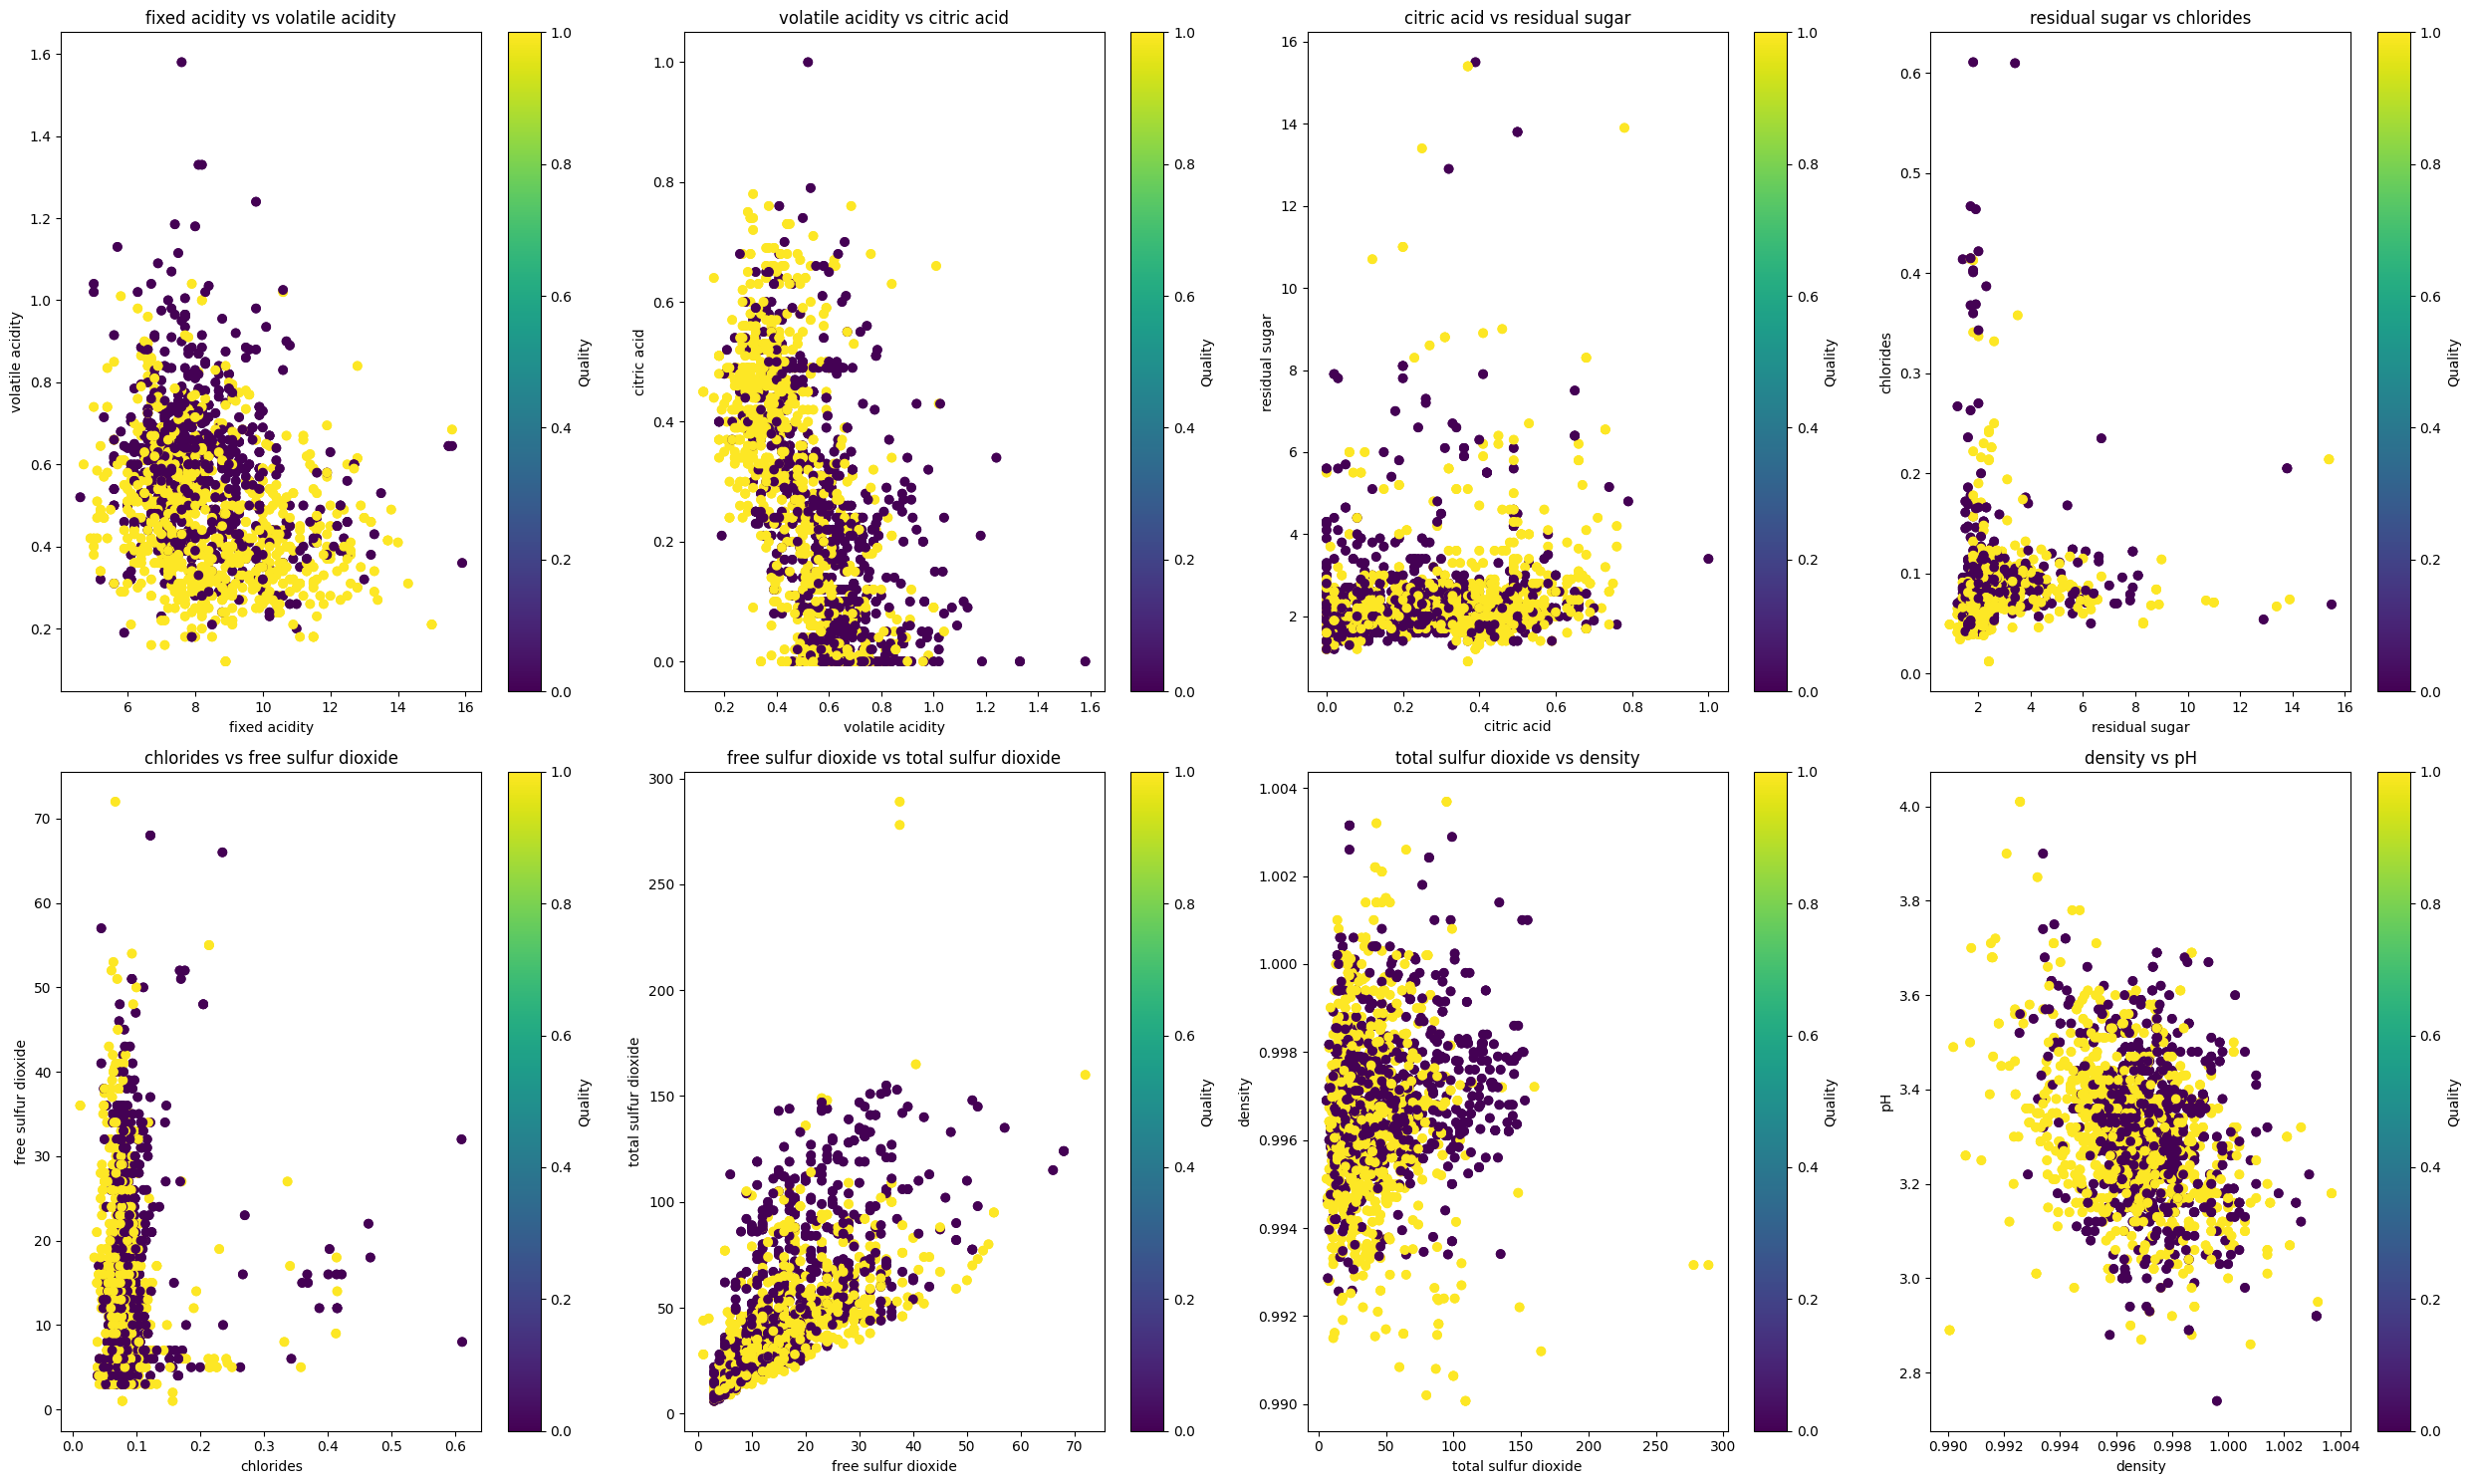

In [10]:
# Selecting all feature combinations for visualization
features = data.columns[:-1]  # Exclude the target column 'quality'

# Setting up subplots
fig, axes = plt.subplots(2, 4, figsize=(25, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting 8 feature combinations
for i, (feature1, feature2) in enumerate(zip(features[:-1], features[1:])):
    if i >= 8:
        break
    ax = axes[i]
    ax.scatter(data[feature1], data[feature2], c=data['quality'], cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title('{} vs {}'.format(feature1, feature2))
    fig.colorbar(ax.scatter(data[feature1], data[feature2], c=data['quality'], cmap='viridis'), ax=ax, label='Quality')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [11]:
# Splitting the data into training and testing data
# data.drop('quality', axis=1) drops the quality column, the rest of the columns are the features
# data['quality'] is the quality column, this is the target
# test_size=0.2 means 20% of the data will be used for testing

accuracy_dt = []
accuracy_lr = []
accuracy_svm = []
accuracy_svm_linear = []


# Define models
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_lr = LogisticRegression(max_iter=1000)
model_svm = svm.SVC(kernel='rbf', C=1)
model_svm_linear = svm.SVC(C=1, kernel='linear')

# Perform cross-validation
cv_scores_dt = cross_val_score(model_dt, data.drop('quality', axis=1), data['quality'], cv=5)
cv_scores_lr = cross_val_score(model_lr, data.drop('quality', axis=1), data['quality'], cv=5)
cv_scores_svm = cross_val_score(model_svm, data.drop('quality', axis=1), data['quality'], cv=5)
cv_scores_svm_linear = cross_val_score(model_svm_linear, data.drop('quality', axis=1), data['quality'], cv=5)

# Append mean cross-validation scores to accuracy lists
accuracy_dt.append(np.mean(cv_scores_dt))
accuracy_lr.append(np.mean(cv_scores_lr))
accuracy_svm.append(np.mean(cv_scores_svm))
accuracy_svm_linear.append(np.mean(cv_scores_svm_linear))

print("Decision Tree Accuracy: ", np.mean(accuracy_dt))
print("Logistic Regression Accuracy: ", np.mean(accuracy_lr))
print("Support Vector Machine Accuracy: ", np.mean(accuracy_svm))
print("Support Vector Machine Linear Accuracy: ", np.mean(accuracy_svm_linear))



Decision Tree Accuracy:  0.7135775862068966
Logistic Regression Accuracy:  0.7323452194357366
Support Vector Machine Accuracy:  0.6309913793103449
Support Vector Machine Linear Accuracy:  0.7323393416927899


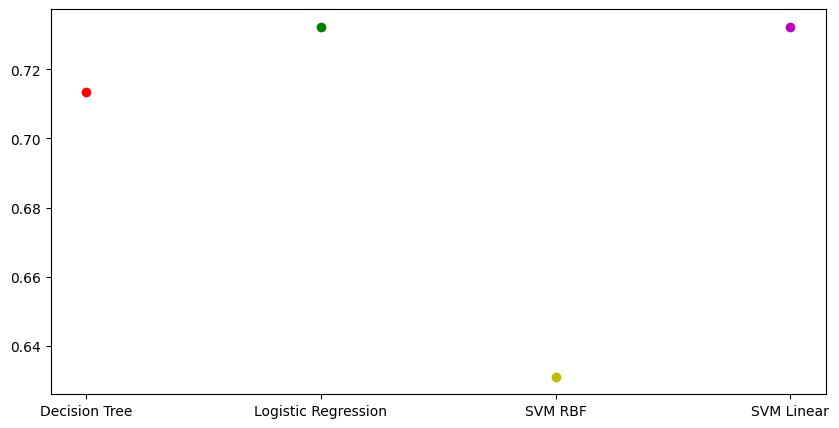

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(1, np.mean(accuracy_dt), 'ro')
plt.plot(2, np.mean(accuracy_lr), 'go')
plt.plot(3, np.mean(accuracy_svm), 'yo')
plt.plot(4, np.mean(accuracy_svm_linear), 'mo')
# rename the x_axis labels
plt.xticks([1, 2, 3, 4], ['Decision Tree', 'Logistic Regression', 'SVM RBF', 'SVM Linear'])
plt.show()
